In [1]:
from eda import EDAProcessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proc = EDAProcessor("loan_data.csv")
df = proc.load_and_process()
print(df.columns.tolist())

['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']


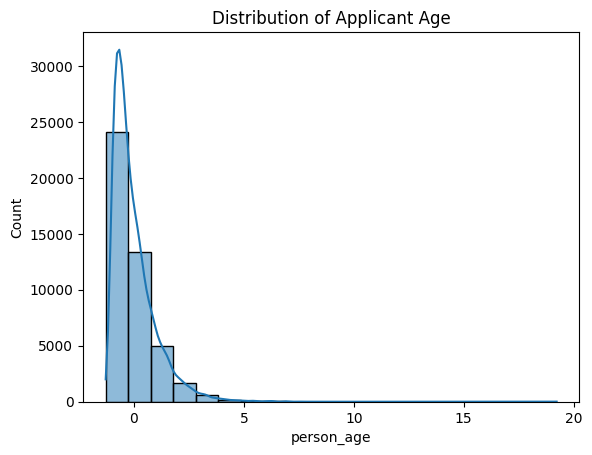

In [3]:
sns.histplot(df['person_age'], bins=20, kde=True)
plt.title("Distribution of Applicant Age")
plt.show()

/var/folders/90/n_22ywz53wl36bfcxb4msf7w0000gn/T/ipykernel_9447/2352409084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="person_gender", data=df, palette="Set2")


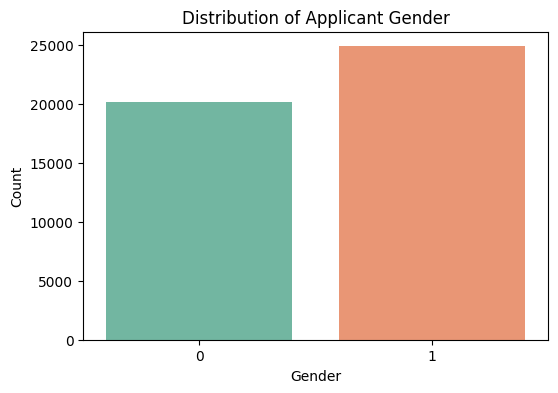

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="person_gender", data=df, palette="Set2")

plt.title("Distribution of Applicant Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

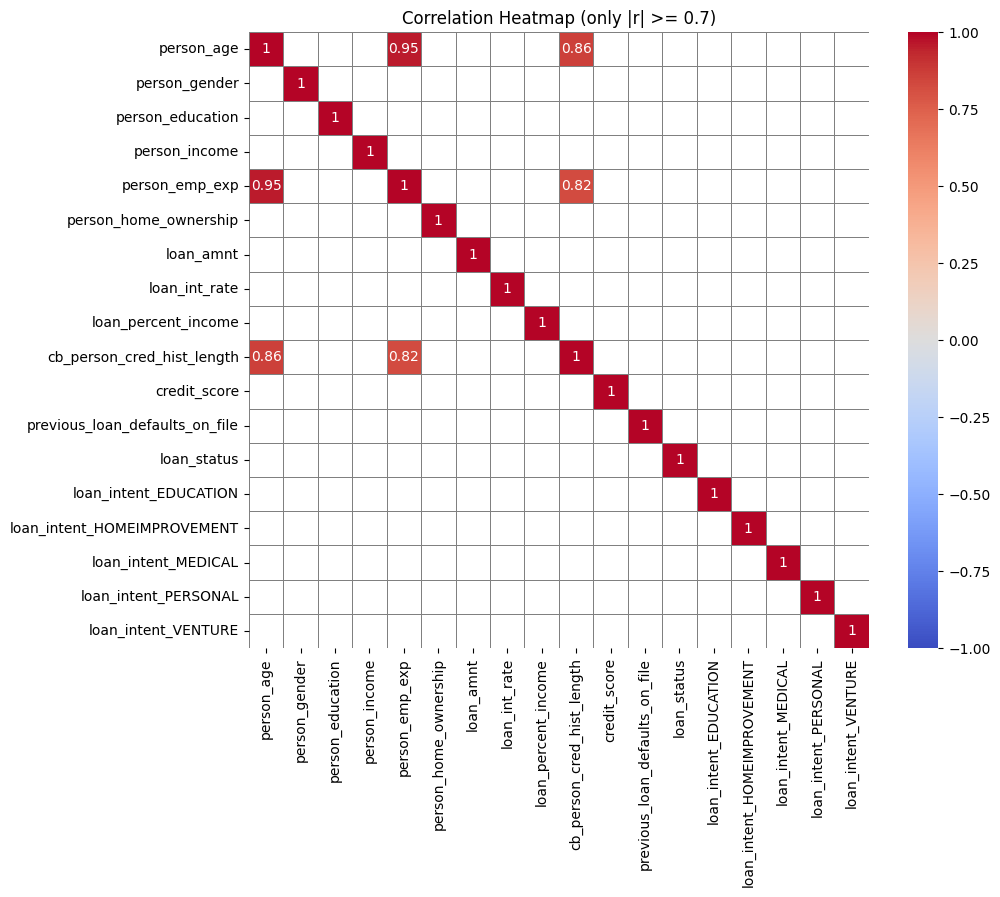

In [5]:
corr = df.corr()
THRESH = 0.7
tri_mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
strong = corr.where(tri_mask).stack().loc[lambda s: s.abs() >= THRESH].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr.where(corr.abs() >= THRESH), annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, linecolor="gray")
plt.title(f"Correlation Heatmap (only |r| >= {THRESH})")
plt.show()

/var/folders/90/n_22ywz53wl36bfcxb4msf7w0000gn/T/ipykernel_9447/2705455312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='coolwarm')


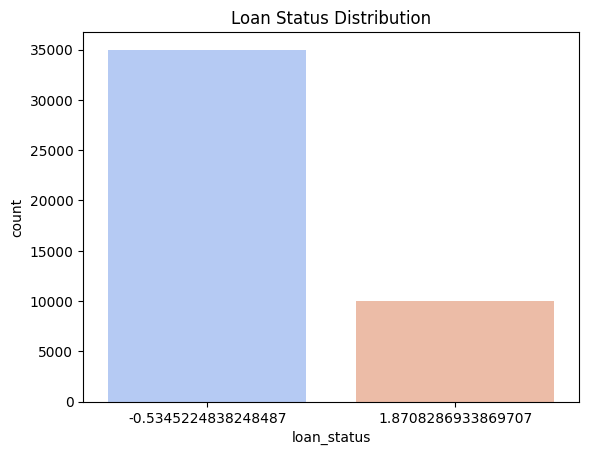

In [6]:
sns.countplot(x='loan_status', data=df, palette='coolwarm')
plt.title('Loan Status Distribution')
plt.show()

/var/folders/90/n_22ywz53wl36bfcxb4msf7w0000gn/T/ipykernel_9447/2925449442.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='credit_score', data=df, palette='Set2')


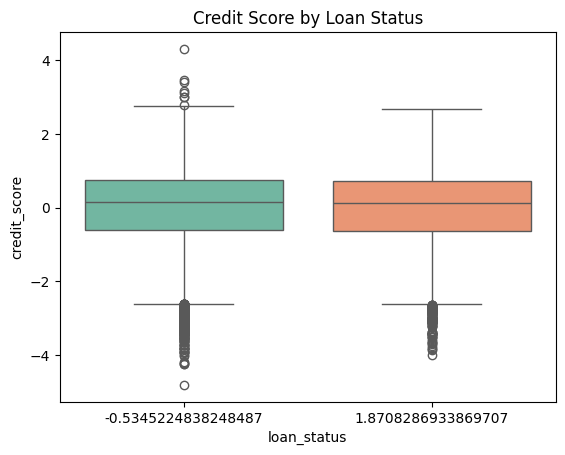

In [7]:
sns.boxplot(x='loan_status', y='credit_score', data=df, palette='Set2')
plt.title('Credit Score by Loan Status')
plt.show()

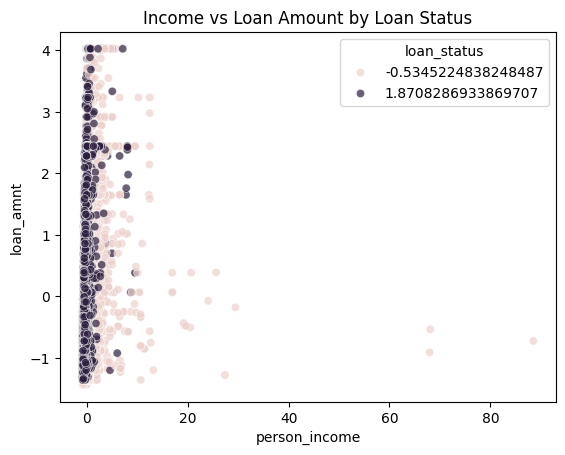

In [8]:
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df, alpha=0.7)
plt.title('Income vs Loan Amount by Loan Status')
plt.show()

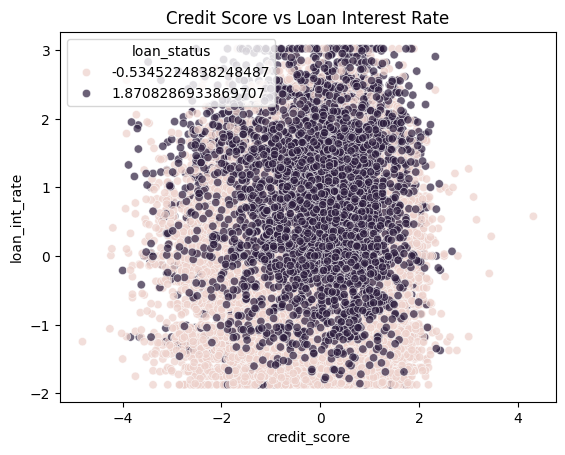

In [9]:
sns.scatterplot(x='credit_score', y='loan_int_rate', hue='loan_status', data=df, alpha=0.7)
plt.title('Credit Score vs Loan Interest Rate')
plt.show()